
Downloading the dataset

We will be using the dataset from kaggle https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
dataset_url = "https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia"

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mesugareymond
Your Kaggle Key: ··········


  0%|          | 9.00M/2.29G [00:00<00:34, 70.9MB/s]

100%|██████████| 2.29G/2.29G [00:30<00:00, 80.4MB/s]


In [9]:
data_dir = "./chest-xray-pneumonia/chest_xray"

In [10]:
import os

In [11]:
os.listdir(data_dir)

['train', 'chest_xray', 'val', 'test', '__MACOSX']

Deleting unecessary folders

In [18]:
import shutil

# shutil.rmtree(data_dir + "/__MACOSX")
shutil.rmtree(data_dir + "/chest_xray")

In [19]:
os.listdir(data_dir)

['train', 'val', 'test']

Import the dataset <br>
Use the ImageFolder class from torchvision

In [21]:
from torchvision.datasets import ImageFolder

In [23]:
dataset = ImageFolder(data_dir)

In [24]:
len(dataset)

5856

In [25]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=1857x1317 at 0x7F65703117D0>, 0)

In [26]:
dataset.classes

['test', 'train', 'val']

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

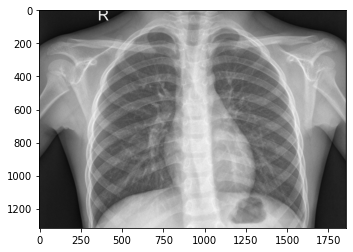

In [38]:
img, label = dataset[0]
plt.imshow(img)

In [44]:
import torchvision.transforms as tt
dataset = ImageFolder(data_dir,tt.Compose([tt.Resize(224), tt.CenterCrop(224), tt.ToTensor()]))

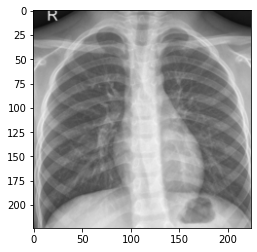

In [58]:
img, label = dataset[0]

plt.imshow(img.permute((1,2,0)))

In [68]:
train_ds = ImageFolder(data_dir + "/train",tt.Compose([tt.Resize(224), tt.CenterCrop(224), tt.ToTensor()]))
test_ds = ImageFolder(data_dir + "/test",tt.Compose([tt.Resize(224), tt.CenterCrop(224), tt.ToTensor()]))
val_ds = ImageFolder(data_dir + "/val",tt.Compose([tt.Resize(224), tt.CenterCrop(224), tt.ToTensor()]))

Checking the length of each set

In [69]:
len(train_ds)

5216

In [70]:
len(test_ds)

624

In [71]:
len(train_ds)

5216

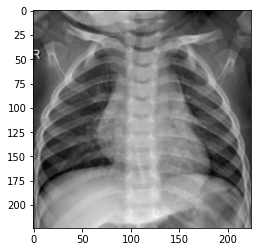

In [73]:
img, label = train_ds[1]

plt.imshow(img.permute((1,2,0)))

creating data loader

In [74]:
from torch.utils.data import DataLoader
batch_size = 256

train_dl = DataLoader(train_ds, 
                      batch_size, 
                      shuffle=True, 
                      num_workers=4, 
                      pin_memory=True)
val_dl = DataLoader(val_ds, 
                    batch_size, 
                    num_workers=4, 
                    pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [75]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


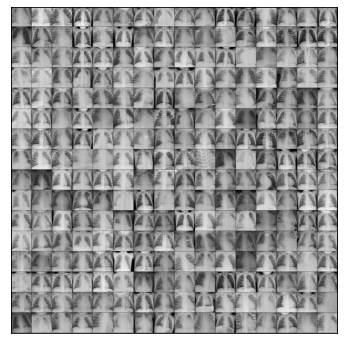

In [77]:
show_batch(train_dl)